In [1]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

In [2]:
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [3]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/akshatgupta/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [4]:
all_pos_tw = twitter_samples.strings('positive_tweets.json')
all_neg_tw = twitter_samples.strings('negative_tweets.json')

In [5]:
print(f"Number of +ve tweets: {len(all_pos_tw)}")
print(f"Number of -ve tweets: {len(all_neg_tw)}")

print(f"\nThe type of all_pos_tw is: {type(all_pos_tw)}")
print(f"The type of a tweet entry is {type(all_neg_tw[0])}")

Number of +ve tweets: 5000
Number of -ve tweets: 5000

The type of all_pos_tw is: <class 'list'>
The type of a tweet entry is <class 'str'>


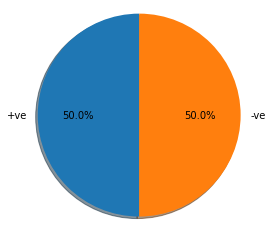

In [6]:
fig = plt.figure(figsize=(4,4))

labs = ['+ve','-ve']
sizes = [len(all_pos_tw),len(all_neg_tw)]
plt.pie(sizes, labels=labs, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [7]:
def print_green(s):
    print('\033[92m')
    print(s)
    print('\033[94m')
def print_red(s):
    print('\033[91m')
    print(s)
    print('\033[94m')

In [8]:
print_green(all_pos_tw[random.randint(0,5000)])
print_red(all_neg_tw[random.randint(0,5000)])


Have a blessed friday :)
#جمعة_مباركة


@PUKENIHORAN awww kiligs TY :(



In [9]:
tweet = all_pos_tw[2277]
print_green(tweet)


My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i



In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akshatgupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [12]:
print_green(tweet)
print('\033[94m')


My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i




In [13]:
tweet_1 = re.sub(r'^RT[\s]+','',tweet)
tweet_2 = re.sub(r'https?://[^\s\n\r]+','',tweet_1)
tweet_3 = re.sub(r'#','',tweet_2)
print_green(tweet_3)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 



In [14]:
tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
tweet_tokens = tokenizer.tokenize(tweet_3)
print(f"Tokenized String:\n{tweet_tokens}")

Tokenized String:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [15]:
stopwords_eng = stopwords.words('english')
print(f'Stopwords:\n{stopwords_eng}')
print(f'Punctuation:\n{string.punctuation}')

Stopwords:
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so'

In [16]:
print_green(tweet_tokens)


['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']



In [17]:
tweet_clean = []
for word in tweet_tokens:
    if (word not in stopwords_eng and word not in string.punctuation):
        tweet_clean.append(word)

print_green(tweet_clean)


['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']



In [18]:
stemmer = PorterStemmer()

tweet_stem = []
for word in tweet_clean:
    tweet_stem.append(stemmer.stem(word))
print_green(tweet_stem)


['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']



In [19]:
def process_tweet(tweet):
    import re
    import string
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    from nltk.tokenize import TweetTokenizer

    tweet_1 = re.sub(r'^RT[\s]+','',tweet)
    tweet_2 = re.sub(r'https?://[^\s\n\r]+','',tweet_1)
    tweet_3 = re.sub(r'#','',tweet_2)

    tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet_3)

    tweet_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_eng and word not in string.punctuation):
            tweet_clean.append(word)

    stemmer = PorterStemmer()

    tweet_stem = []
    for word in tweet_clean:
        tweet_stem.append(stemmer.stem(word))

    return tweet_stem

In [20]:
tw = all_neg_tw[1]
print_red(tw)


Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(



In [21]:
tw_stem = process_tweet(tw)
print_red(tw_stem)


['everyth', 'kid', 'section', 'ikea', 'cute', 'shame', "i'm", 'nearli', '19', '2', 'month', ':(']

